In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#Read Toyota data
data_TM = pd.read_csv('/content/TSLA.csv')
data_TM

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
2997,2023-11-30,245.139999,245.220001,236.910004,240.080002,240.080002,132353200
2998,2023-12-01,233.139999,240.190002,231.899994,238.830002,238.830002,121173500
2999,2023-12-04,235.750000,239.369995,233.289993,235.580002,235.580002,104099800
3000,2023-12-05,233.869995,246.660004,233.699997,238.720001,238.720001,137971100


In [3]:
train_size = int(0.8 * len(data_TM))
test_size = int(0.1 * len(data_TM))
val_size = len(data_TM) - train_size - test_size

train_data = data_TM[:train_size]
test_data = data_TM[train_size:train_size+test_size]
val_data = data_TM[train_size+test_size:]

In [4]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00


<Figure size 1200x400 with 0 Axes>

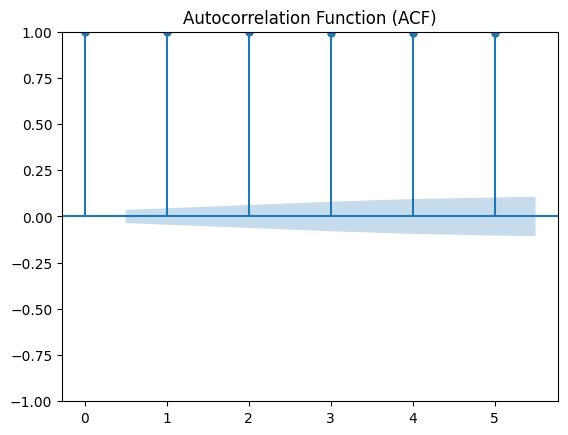

<Figure size 1200x400 with 0 Axes>

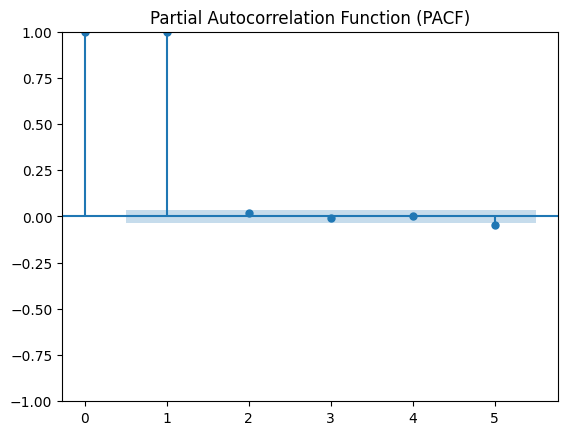

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ACF plot
plt.figure(figsize=(12, 4))
plot_acf(data_TM['Close'], lags=5, title='Autocorrelation Function (ACF)')
plt.show()

# PACF plot
plt.figure(figsize=(12, 4))
plot_pacf(data_TM['Close'], lags=5, title='Partial Autocorrelation Function (PACF)')
plt.show()

In [63]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
#from pmdarima.arima import auto_arima
#model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_TM['Close'], order=(5, 2, 1))
# Fit the model
results = model.fit()

In [64]:
# 4. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = results.forecast(steps=len(y_test))  # Use forecast method for out-of-sample predictions

# 5. Validation
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
# Predict for validation set
y_val_pred = results.forecast(steps=len(y_val))  # Use forecast method for out-of-sample predictions
print('Predicted values for the validation set:')
print(y_val_pred)

Predicted values for the validation set:
3002    239.484881
3003    239.361296
3004    239.696340
3005    239.748172
3006    239.825037
           ...    
3298    262.942470
3299    263.021644
3300    263.100818
3301    263.179992
3302    263.259167
Name: predicted_mean, Length: 301, dtype: float64


In [70]:
# Create an array of 30 consecutive integers starting from last_index
last_index = data_TM.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = results.forecast(steps=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
3002    239.484881
3003    239.361296
3004    239.696340
3005    239.748172
3006    239.825037
3007    239.888639
3008    239.988268
3009    240.060451
3010    240.140522
3011    240.218491
3012    240.299334
3013    240.377636
3014    240.457044
3015    240.536096
3016    240.615410
3017    240.694493
3018    240.773702
3019    240.852861
3020    240.932048
3021    241.011213
3022    241.090392
3023    241.169564
3024    241.248740
3025    241.327913
3026    241.407088
3027    241.486262
3028    241.565436
3029    241.644610
3030    241.723784
3031    241.802958
Name: predicted_mean, dtype: float64


In [71]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(y_val_pred, y_val)
val_rmse = np.sqrt(mean_absolute_error(y_val_pred, y_val))
val_mape = mean_absolute_percentage_error(y_val_pred, y_val)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 47.23458704611226
Testing RMSE: 61.92286151802782
Testing MAPE: 0.18850716592242525
---------------------------
Validation MAE: 45.32282732929874
Validation RMSE: 6.73222305997794
Validation MAPE: 0.18203791997386276


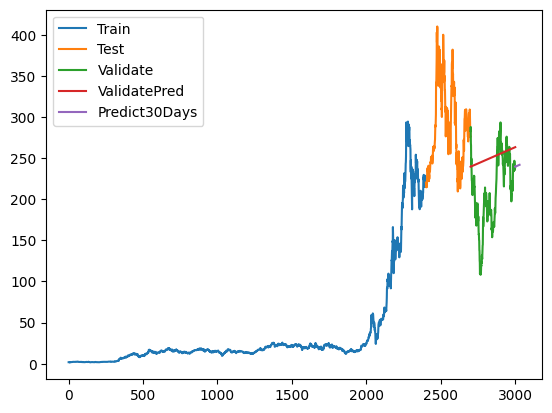

In [73]:
# Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_val_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate','ValidatePred','Predict30Days'])
plt.show()